# ACSE-3 (Numerical Methods) <a class="tocSkip">

## Lecture 12: Finite element methods (FEM) 2 <a class="tocSkip">
    
### Homework exercises <a class="tocSkip">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Homework" data-toc-modified-id="Homework-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Homework</a></span><ul class="toc-item"><li><span><a href="#Homework---Compare-solution-to-diffusion-with-homogeneous-vs-Dirichlet-BCs" data-toc-modified-id="Homework---Compare-solution-to-diffusion-with-homogeneous-vs-Dirichlet-BCs-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Homework - Compare solution to diffusion with homogeneous vs Dirichlet BCs</a></span></li><li><span><a href="#Homework---Laplacian-smoothing" data-toc-modified-id="Homework---Laplacian-smoothing-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Homework - Laplacian smoothing</a></span></li></ul></li></ul></div>

In [148]:
%precision 3
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl
import scipy.sparse as sp
import scipy.sparse.linalg as spla
# the following allows us to plot triangles indicating convergence order
from mpltools import annotation
# as we're in 2D we will be doing some 3D plotting
from mpl_toolkits.mplot3d import Axes3D
# and using some colormaps
from matplotlib import cm
# and we will create some animations!
import matplotlib.animation as animation
from IPython.display import HTML
from pprint import pprint

# Homework


## Homework - Compare solution to diffusion with homogeneous vs Dirichlet BCs 

Use our 1D FEM based time-dependent diffusion solver to investigate the long time solution behaviour (i.e. what steady state does the solution tend to) for the diffusion problem in the cases of homogeneous Neumann and homogeneous Dirichlet boundary conditions. You can use the same Gaussian like initial condition from lecture.

Write some code to compute the area under the solution curve over the domain (i.e. the integral of the solution) in both cases and plot the evolution of this integral as a function of time - what do you notice?

## Homework - Laplacian smoothing

Consider the following mesh.

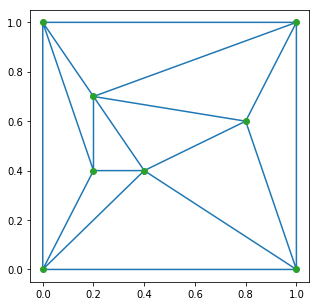

In [110]:
from scipy.spatial import Delaunay

points = np.array([[0.2,0.4],[0.2,0.7], [0.4,0.4], [0.8,0.6]])
# add corners
points = np.concatenate((points,[[0, 0], [0, 1], [1, 0], [1, 1]]))

tri = Delaunay(points, incremental=True)
fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(111)

ax1.triplot(points[:, 0], points[:, 1], tri.simplices)
ax1.plot(points[:, 0], points[:, 1], 'o')

Write some code to implement ["Laplacian smoothing"](https://en.wikipedia.org/wiki/Laplacian_smoothing). 

This is an algorithm whereby every vertex of the mesh is visited in turn and its location is relocated to the mean of the locations of the vertices that are connected to it. This process is iterated until convergence. The idea is that this returns a mesh with improved mesh quality (NB. what we mean by quality is a somewhat complex issues but for our purposes we will consider triangles closer to equilateral to be of better quality).

Write a version of this mesh smoother that maintains the locations of the vertices at the four corners (i.e. so that the underlying "geometry" is maintained).

Also since we really do not want elements to go inverted (for vertices to pass through element faces), add an "under-relaxation" parameter that can help with robustness, but does mean we need more iterations. This means that rather than accepting the newly computed location, we choose a new location that is the weighted sum of the current and new positions - for a complex mesh (as in the next part of question) you may need to use a lot of under-relaxation in order to get a good result.

Once this works, test it out on a mesh generated using a Delaunay method (as above) generated from 20 random vertices arranged within the unit square (the use of random points will most likely lead to a "nasty" mesh with elements far from equilateral).  As in the first example add 4 corners which you maintain in their original locations in order to preserve a square geometry.